### Cousera IBM Applied Data Science Capstone Project

## __Neighborhoods Characteristics of Innovation Hubs and Technology Centers in Kenya__

### <span style="color:blue"> __*Table of Contents*__</span>
__1. Data Downloading and Dataframe Creation__  
__2. Exploratory Data Analysis__  
__3. Foursquare Query__  
__4. K-means Clustering__  
__5. Clustering Visualization__

### Stage 1:  Data Downloading and Dataframe Creation

In [1]:
# import the libraries
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib.ticker import MaxNLocator

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes 
!pip install folium
import folium # map rendering library

from folium import plugins
from folium.plugins import HeatMap

print('Libraries imported.')

     |████████████████████████████████| 102kB 7.8MB/s ta 0:00:011
Libraries imported.


### Here we download the geodata "Infrastructure/Collection of Innovation Hubs and Technology Centers in Kenya" from "The Kenya Open Data" through "(http://www.opendata.go.ke)" 

In [2]:
## Step one: Data Downloading

# Request data from url
request = requests.get('https://opendata.arcgis.com/datasets/6939198044a64596ac7a68df6417c380_0.geojson')
data_original = request.json()
data_original

{'type': 'FeatureCollection',
 'name': 'Infrastructure_Collection_of_Innovation_Hubs_and_Technology_Centers_in_Kenya',
 'crs': {'type': 'name',
  'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'}},
 'features': [{'type': 'Feature',
   'properties': {'OBJECTID': 1,
    'Type': 'Technology Hubs and Programs',
    'Name': 'Ihub',
    'County_Location': 'Nairobi',
    'Target_Market': 'ICT',
    'Y': -1.298752,
    'X': 36.790795,
    'Websites': None,
    'Place_Name___Address': '4th Floor, Bishop Magua Centre\nGeorge Padmore Ln\nNairobi\nKenya',
    'X25': 25,
    'X50': 50,
    'X100': 100,
    'Location_Accuracy': 'Actual '},
   'geometry': {'type': 'Point', 'coordinates': [36.790795, -1.298752]}},
  {'type': 'Feature',
   'properties': {'OBJECTID': 2,
    'Type': 'Technology Hubs and Programs',
    'Name': 'Nailab',
    'County_Location': 'Nairobi',
    'Target_Market': 'ICT',
    'Y': -1.299116,
    'X': 36.79086,
    'Websites': None,
    'Place_Name___Address': '4th Floor, Bi

In [3]:
# Selet data in need 
data_features = data_original['features']
data_features[0]

{'type': 'Feature',
 'properties': {'OBJECTID': 1,
  'Type': 'Technology Hubs and Programs',
  'Name': 'Ihub',
  'County_Location': 'Nairobi',
  'Target_Market': 'ICT',
  'Y': -1.298752,
  'X': 36.790795,
  'Websites': None,
  'Place_Name___Address': '4th Floor, Bishop Magua Centre\nGeorge Padmore Ln\nNairobi\nKenya',
  'X25': 25,
  'X50': 50,
  'X100': 100,
  'Location_Accuracy': 'Actual '},
 'geometry': {'type': 'Point', 'coordinates': [36.790795, -1.298752]}}

In [4]:
## Step two: Dataframe Creation

# Define the dataframe columns
column_names = ['Type','Name','County_Location','Target_Market','Latitude', 'Longitude']

# Instantiate the dataframe
df_innovation = pd.DataFrame(columns=column_names)
df_innovation

,Type,Name,County_Location,Target_Market,Latitude,Longitude


In [5]:
# Dataframe creation
for data in data_features:
    Type = data['properties']['Type'] 
    Name = data['properties']['Name']
    County_Location = data['properties']['County_Location']    
    Target_Market = data['properties']['Target_Market']
    Latitude = data['properties']['Y']
    Longitude = data['properties']['X']

    df_innovation = df_innovation.append({'Type': Type,
                        'Name': Name,
                        'County_Location': County_Location,
                        'Target_Market': Target_Market,
                         'Latitude': Latitude,
                         'Longitude': Longitude}, ignore_index=True)
df_innovation.head()

,Type,Name,County_Location,Target_Market,Latitude,Longitude
0,Technology Hubs and Programs,Ihub,Nairobi,ICT,-1.298752,36.790795
1,Technology Hubs and Programs,Nailab,Nairobi,ICT,-1.299116,36.790860
2,Technology Hubs and Programs,Lakehub,Kisumu,ICT,-0.108192,34.748901
3,Technology Hubs and Programs,Chandaria Business Center/Kenyatta university,Kiambu,All sectors,-1.182003,36.936359
4,Technology Hubs and Programs,Empty Hub,Bungoma,ICT,0.566012,34.559121


### Stage 2:  Exploratory Data Analysis

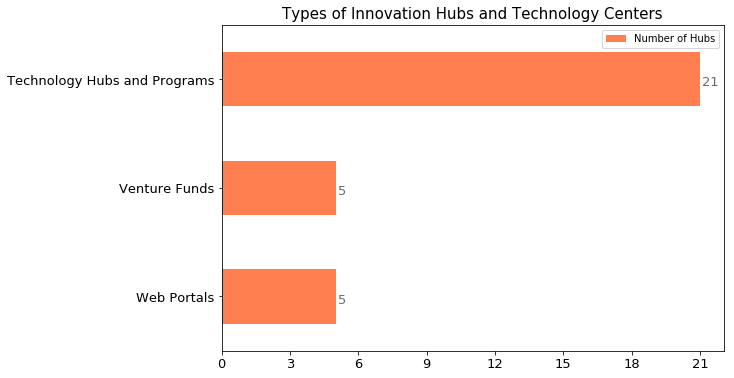

In [6]:
## Step one: Analysis for hub types

# Group by hub type
df_analysis = df_innovation.copy()
df_analysis1= df_analysis.groupby('Type').count()
df_analysis1.reset_index(None, inplace=True)

# Dataframe for plotting the analysis result
column_names1 = ['Hub_types', 'Number of Hubs']
df_plt1= pd.DataFrame(columns=column_names1)
df_plt1['Hub_types'] = df_analysis1['Type']
df_plt1['Number of Hubs'] = df_analysis1['Name']
df_plt1.set_index(['Hub_types'],inplace=True)

# Bar chart setting
ax = df_plt1.plot(kind='barh', figsize=(9,6),color="coral", fontsize=13)
ax.set_title('Types of Innovation Hubs and Technology Centers',fontsize=15)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_ylabel(None)
    
# set individual bar lables
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.1, i.get_y()+.31, \
            str(round((i.get_width()), 2)), fontsize=13, color='dimgrey')

    
# invert for largest on top 
ax.invert_yaxis()   

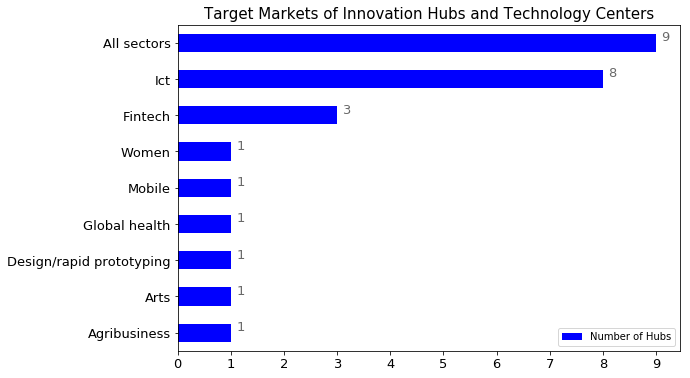

In [7]:
## Step two: Analysis for target markets

# Capitalize target market column
df_analysis['Target_Market']= df_analysis['Target_Market'].str.capitalize()

# Group by Target market
df_analysis2= df_analysis.groupby('Target_Market').count()
df_analysis2.reset_index(None, inplace=True)

# Dataframe for plotting the analysis result
column_names2 = ['Target_Market', 'Number of Hubs']
df_plt2= pd.DataFrame(columns=column_names2)
df_plt2['Target_Market'] = df_analysis2['Target_Market']
df_plt2['Number of Hubs'] = df_analysis2['Name']
df_plt2.sort_values(['Number of Hubs'],inplace=True)
df_plt2.set_index(['Target_Market'],inplace=True)


# Bar chart setting
ax = df_plt2.plot(kind='barh', figsize=(9,6),color="blue", fontsize=13)
ax.set_title('Target Markets of Innovation Hubs and Technology Centers',fontsize=15)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_ylabel(None)

# set individual bar lables
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.1, i.get_y()+.31, \
            str(round((i.get_width()), 2)), fontsize=13, color='dimgrey')
   

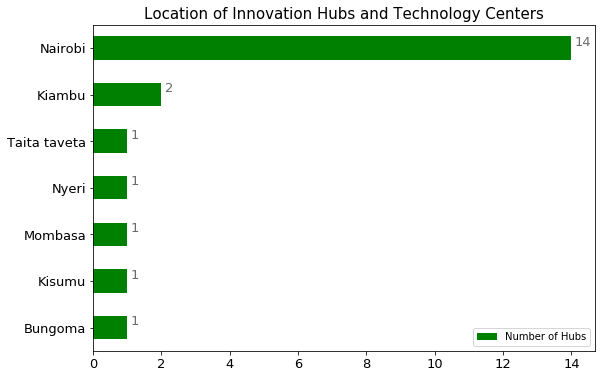

In [8]:
## Step three: Analysis for hub location

# Drop web-portal 
df_analysis.dropna(inplace=True)

# Capitalize County column
df_analysis['County_Location']= df_analysis['County_Location'].str.capitalize()

# Group by County
df_analysis3= df_analysis.groupby('County_Location').count()
df_analysis3.reset_index(None, inplace=True)

# Dataframe for plotting the analysis result
column_names3 = ['County', 'Number of Hubs']
df_plt3= pd.DataFrame(columns=column_names3)
df_plt3['County'] = df_analysis3['County_Location']
df_plt3['Number of Hubs'] = df_analysis3['Name']
df_plt3.sort_values(['Number of Hubs'],inplace=True)
df_plt3.set_index(['County'],inplace=True)

# Bar chart setting
ax = df_plt3.plot(kind='barh', figsize=(9,6),color="Green", fontsize=13)
ax.set_title('Location of Innovation Hubs and Technology Centers',fontsize=15)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_ylabel(None)

# set individual bar lables
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.1, i.get_y()+.31, \
            str(round((i.get_width()), 2)), fontsize=13, color='dimgrey')
       

In [9]:
# Drop hubs with no location information
df_innovation.dropna(inplace=True)
df_innovation.head()

,Type,Name,County_Location,Target_Market,Latitude,Longitude
0,Technology Hubs and Programs,Ihub,Nairobi,ICT,-1.298752,36.790795
1,Technology Hubs and Programs,Nailab,Nairobi,ICT,-1.299116,36.790860
2,Technology Hubs and Programs,Lakehub,Kisumu,ICT,-0.108192,34.748901
3,Technology Hubs and Programs,Chandaria Business Center/Kenyatta university,Kiambu,All sectors,-1.182003,36.936359
4,Technology Hubs and Programs,Empty Hub,Bungoma,ICT,0.566012,34.559121


In [10]:
# create map and display it

# Kenya Coordinates
latitude=-1.2921
longitude=36.8219

# Create the Kenya map
tech_map = folium.Map(location=[latitude, longitude], zoom_start=7, tiles='Stamen Terrain')

# Add Kenya Borough Geojson
#folium.GeoJson(GeoBorough, style_function=boroughs_style, name='geojson').add_to(tech_map)

# Instantiate a feature group for the incidents in the dataframe
hubs = folium.map.FeatureGroup()

# Loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_innovation.Latitude, df_innovation.Longitude):
    hubs.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# Add pop-up text to each marker on the map
latitudes = list(df_innovation.Latitude)
longitudes = list(df_innovation.Longitude)
labels = list(df_innovation.Name)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(tech_map)    
    
# Add points to map
tech_map.add_child(hubs)

In [11]:
# Add Kenya Borough Geojson 
r_kenya = requests.get('http://data.humdata.org/dataset/e66dbc70-17fe-4230-b9d6-855d192fc05c/resource/51939d78-35aa-4591-9831-11e61e555130/download/kenya.geojson')
GeoBorough = r_kenya.json()

def boroughs_style(feature):
    return { 'color': 'blue', 'fill': False }

# Create the Kenya Borough map
Borough_map = folium.Map(location=[latitude, longitude], zoom_start=7, tiles='Stamen Toner')
folium.GeoJson(GeoBorough, style_function=boroughs_style, name='geojson').add_to(Borough_map)

# Plot the heat map
heat_data = df_innovation[['Latitude', 'Longitude']].values.tolist()
Borough_map.add_child(HeatMap(heat_data))

### Stage 3:  Foursquare Query

#### Define Foursquare Credentials and Version

In [12]:
# @hidden_cell

# Define Foursquare Credentials and Version
CLIENT_ID = 'VYAEP5UTTYHE4ELU0JVU3LVAEGQ3VHMC0ILS3XO1FA3X2BXA' 
CLIENT_SECRET = 'W2VF0WG3ORZD3J4YP3ZBXVJWDHIVBUPYN0EN13JTHEUR1TWZ' 
VERSION = '20180605'

In [13]:
## Step One: Explore the neighborhoods around the hubs

# Create a function for all the neighborhoods

def getNearbyVenues(names, latitudes, longitudes, radius=800, LIMIT=150):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Name', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

# Create Toronto nearby venues by running the above function
kenya_venues = getNearbyVenues(names=df_innovation['Name'],
                                   latitudes=df_innovation['Latitude'],
                                   longitudes=df_innovation['Longitude']
                                  )

Ihub
Nailab
Lakehub
Chandaria Business Center/Kenyatta university
Empty Hub
Sotehub
Swahilibox
Nairobi Industrial Park(JKUAT)
C4D lab(UoN)
Pawa254hub
E4impact-Tangaza College
KCA Centre for entreprenuership
Ilab africa
Mlab East Africa
Akirachix
Ibiz East Africa (strathmore)
Dedan Kimathi University Innovation and Incubation Centre (DeHUB)
Village Capital
Growth Hub
Gearbox
InvesteQ CAPITAL Limited 


In [14]:
# Obtain the new dataframe for kenya venues
print(kenya_venues.shape)
kenya_venues.head()

(590, 7)


,Name,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Ihub,-1.298752,36.790795,Pete's Burrito Shop,-1.298586,36.790762,Burrito Place
1,Ihub,-1.298752,36.790795,Soiree Garden Restaurant,-1.297648,36.791483,Sports Bar
2,Ihub,-1.298752,36.790795,Debonairs Pizza Ngong Road,-1.299768,36.790409,Pizza Place
3,Ihub,-1.298752,36.790795,Newscafe Vibe,-1.294755,36.787473,Lounge
4,Ihub,-1.298752,36.790795,Kesh Kesh,-1.292535,36.789639,Café


In [15]:
# Check venues returned for each neighborhood
kenya_venues.groupby('Name').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Name,,,,,,
Akirachix,61,61,61,61,61,61
C4D lab(UoN),39,39,39,39,39,39
Chandaria Business Center/Kenyatta university,6,6,6,6,6,6
Dedan Kimathi University Innovation and Incubation Centre (DeHUB),2,2,2,2,2,2
E4impact-Tangaza College,5,5,5,5,5,5
Empty Hub,8,8,8,8,8,8
Gearbox,61,61,61,61,61,61
Growth Hub,38,38,38,38,38,38
Ibiz East Africa (strathmore),28,28,28,28,28,28


In [16]:
# Check unique categories curated from all the returned venues
print('There are {} uniques categories.'.format(len(kenya_venues['Venue Category'].unique())))

There are 91 uniques categories.


In [17]:
## Step two: Analyze the neighborhoods 

# one hot encoding
kenya_onehot = pd.get_dummies(kenya_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
kenya_onehot['Name'] = kenya_venues['Name'] 

# move neighborhood column to the first column
fixed_columns = [kenya_onehot.columns[-1]] + list(kenya_onehot.columns[:-1])
kenya_onehot = kenya_onehot[fixed_columns]

kenya_onehot.head()

,Name,African Restaurant,Art Gallery,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,BBQ Joint,Bakery,Bar,Baseball Field,Bed & Breakfast,Beer Garden,Boarding House,Bookstore,Burger Joint,Burrito Place,Bus Station,Bus Stop,Café,Child Care Service,Chinese Restaurant,Cocktail Bar,Coffee Shop,Convenience Store,Deli / Bodega,Department Store,Diner,Dumpling Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Fast Food Restaurant,Flower Shop,Food Court,Fried Chicken Joint,Gaming Cafe,Gas Station,Gastropub,Golf Course,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Historic Site,Hookah Bar,Hostel,Hotel,Hotel Bar,Indian Restaurant,Indie Movie Theater,Italian Restaurant,Juice Bar,Karaoke Bar,Lighthouse,Lounge,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Motel,Movie Theater,New American Restaurant,Nightclub,Office,Optical Shop,Park,Performing Arts Venue,Pizza Place,Pool,Pub,Residential Building (Apartment / Condo),Resort,Restaurant,Rugby Pitch,Salad Place,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Skating Rink,Spa,Sports Bar,Stadium,Supermarket,Tea Room,Thai Restaurant,Theme Park Ride / Attraction,Turkish Restaurant,Vineyard,Wine Bar,Zoo
0,Ihub,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Ihub,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,Ihub,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Ihub,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Ihub,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
# Caculate the mean of the frequency of occurrence of each category
kenya_grouped = kenya_onehot.groupby('Name').mean().reset_index()
print(kenya_grouped.shape)
kenya_grouped.head()

(21, 92)


,Name,African Restaurant,Art Gallery,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,BBQ Joint,Bakery,Bar,Baseball Field,Bed & Breakfast,Beer Garden,Boarding House,Bookstore,Burger Joint,Burrito Place,Bus Station,Bus Stop,Café,Child Care Service,Chinese Restaurant,Cocktail Bar,Coffee Shop,Convenience Store,Deli / Bodega,Department Store,Diner,Dumpling Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Fast Food Restaurant,Flower Shop,Food Court,Fried Chicken Joint,Gaming Cafe,Gas Station,Gastropub,Golf Course,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Historic Site,Hookah Bar,Hostel,Hotel,Hotel Bar,Indian Restaurant,Indie Movie Theater,Italian Restaurant,Juice Bar,Karaoke Bar,Lighthouse,Lounge,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Motel,Movie Theater,New American Restaurant,Nightclub,Office,Optical Shop,Park,Performing Arts Venue,Pizza Place,Pool,Pub,Residential Building (Apartment / Condo),Resort,Restaurant,Rugby Pitch,Salad Place,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Skating Rink,Spa,Sports Bar,Stadium,Supermarket,Tea Room,Thai Restaurant,Theme Park Ride / Attraction,Turkish Restaurant,Vineyard,Wine Bar,Zoo
0,Akirachix,0.032787,0.016393,0.0,0.0,0.0,0.016393,0.032787,0.098361,0.000000,0.016393,0.0,0.000000,0.032787,0.032787,0.032787,0.0,0.0,0.049180,0.0,0.016393,0.000000,0.065574,0.0,0.0,0.0,0.032787,0.016393,0.0,0.016393,0.016393,0.000000,0.0,0.0,0.000000,0.016393,0.000000,0.0,0.016393,0.000000,0.000000,0.0,0.0,0.0,0.0,0.081967,0.000000,0.016393,0.0,0.000000,0.016393,0.016393,0.0,0.049180,0.016393,0.0,0.016393,0.016393,0.016393,0.016393,0.0,0.032787,0.0,0.0,0.000000,0.0,0.032787,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.016393,0.0,0.0,0.032787,0.000000,0.04918,0.000000,0.000000,0.016393,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000
1,C4D lab(UoN),0.000000,0.000000,0.0,0.0,0.0,0.000000,0.051282,0.000000,0.000000,0.000000,0.0,0.025641,0.000000,0.000000,0.000000,0.0,0.0,0.051282,0.0,0.051282,0.025641,0.025641,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.025641,0.025641,0.0,0.0,0.025641,0.000000,0.025641,0.0,0.000000,0.000000,0.025641,0.0,0.0,0.0,0.0,0.102564,0.025641,0.000000,0.0,0.025641,0.000000,0.000000,0.0,0.025641,0.000000,0.0,0.025641,0.000000,0.000000,0.000000,0.0,0.102564,0.0,0.0,0.025641,0.0,0.025641,0.000000,0.0,0.0,0.0,0.051282,0.025641,0.025641,0.000000,0.0,0.0,0.000000,0.025641,0.00000,0.000000,0.025641,0.025641,0.0,0.0,0.0,0.051282,0.025641,0.0,0.0,0.0,0.025641
2,Chandaria Business Center/Kenyatta university,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.166667,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.166667,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.166667,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.166667,0.0,0.000000,0.166667,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.166667,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000
3,Dedan Kimathi University Innovation and Incuba...,1.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000
4,E4impact-Tangaza College,0.000000,0.000000,0.2,0.0,0.0,0.000

In [19]:
# Print each neighborhood along with the top 5 most common venues
num_top_venues = 5

for hood in kenya_grouped['Name']:
    print("----"+hood+"----")
    temp = kenya_grouped[kenya_grouped['Name'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Akirachix----
           venue  freq
0            Bar  0.10
1          Hotel  0.08
2    Coffee Shop  0.07
3  Shopping Mall  0.05
4           Café  0.05


----C4D lab(UoN)----
                venue  freq
0               Hotel  0.10
1           Nightclub  0.10
2     Thai Restaurant  0.05
3              Bakery  0.05
4  Chinese Restaurant  0.05


----Chandaria Business Center/Kenyatta university----
            venue  freq
0            Pool  0.17
1     Coffee Shop  0.17
2            Park  0.17
3  Baseball Field  0.17
4             Gym  0.17


----Dedan Kimathi University Innovation and Incubation Centre (DeHUB)----
                                      venue  freq
0                        African Restaurant   1.0
1  Residential Building (Apartment / Condo)   0.0
2                                      Pool   0.0
3                               Pizza Place   0.0
4                     Performing Arts Venue   0.0


----E4impact-Tangaza College----
                  venue  freq
0           

In [20]:
# Define the function to sort the venues in descending order 
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [24]:
# Display the top 10 venues for each neighborhood
import numpy as np

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Name']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Name'] = kenya_grouped['Name']

for ind in np.arange(kenya_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(kenya_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Akirachix,Bar,Hotel,Coffee Shop,Lounge,Café,Shopping Mall,Shoe Store,Diner,Nightclub,Pizza Place
1,C4D lab(UoN),Nightclub,Hotel,Restaurant,Bakery,Café,Thai Restaurant,Chinese Restaurant,Gym / Fitness Center,Park,Middle Eastern Restaurant
2,Chandaria Business Center/Kenyatta university,Coffee Shop,Gym,Park,Skating Rink,Baseball Field,Pool,Grocery Store,Fast Food Restaurant,Deli / Bodega,Historic Site
3,Dedan Kimathi University Innovation and Incuba...,African Restaurant,Convenience Store,Department Store,Diner,Dumpling Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Fast Food Restaurant,Flower Shop,Food Court
4,E4impact-Tangaza College,Arts & Crafts Store,Restaurant,Fast Food Restaurant,Bus Station,Gastropub,Zoo,Fried Chicken Joint,Diner,Dumpling Restaurant,Eastern European Restaurant


### Stage 4:  K-means Clustering

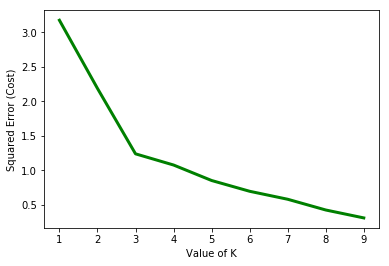

In [25]:
## Step One: Cluster the neighborhoods 

kenya_grouped_clustering = kenya_grouped.drop('Name', 1)

# Define cost function to find the best k
cost =[] 
for i in range(1, 10): 
    KM = KMeans(n_clusters = i, max_iter = 500) 
    KM.fit(kenya_grouped_clustering) 
      
    # calculates squared error 
    # for the clustered points 
    cost.append(KM.inertia_)  
    
# Plot the cost against K values 
plt.plot(range(1, 10), cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Squared Error (Cost)") 
plt.show() 

#### The point of the elbow is the most optimal value for choosing k, which is K=3

In [26]:
# set number of clusters
kclusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(kenya_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]   

array([0, 0, 0, 2, 0, 2, 0, 0, 0, 0], dtype=int32)

In [31]:
# Add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

kenya_merge = df_innovation

# Merge kenya_grouped with hub data to add latitude/longitude for each neighborhood
kenya_merge = kenya_merge.join(neighborhoods_venues_sorted.set_index('Name'), on='Name')

# Check the merged columns
kenya_merge.head() 

,Type,Name,County_Location,Target_Market,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Technology Hubs and Programs,Ihub,Nairobi,ICT,-1.298752,36.790795,0,Bar,Hotel,Coffee Shop,Lounge,Café,Shopping Mall,Shoe Store,Diner,Nightclub,Pizza Place
1,Technology Hubs and Programs,Nailab,Nairobi,ICT,-1.299116,36.790860,0,Hotel,Bar,Coffee Shop,Lounge,Shopping Mall,Shoe Store,Diner,Nightclub,Pizza Place,Café
2,Technology Hubs and Programs,Lakehub,Kisumu,ICT,-0.108192,34.748901,0,Shopping Mall,Hotel,Office,Bar,Lounge,Diner,Chinese Restaurant,Hotel Bar,Coffee Shop,Gas Station
3,Technology Hubs and Programs,Chandaria Business Center/Kenyatta university,Kiambu,All sectors,-1.182003,36.936359,0,Coffee Shop,Gym,Park,Skating Rink,Baseball Field,Pool,Grocery Store,Fast Food Restaurant,Deli / Bodega,Historic Site
4,Technology Hubs and Programs,Empty Hub,Bungoma,ICT,0.566012,34.559121,2,African Restaurant,Nightclub,Department Store,Grocery Store,Hotel Bar,Thai Restaurant,Food Court,Deli / Bodega,Vineyard,Diner


### Stage 5:  Clustering Visualization

In [32]:
## Step one: Locate the clusters

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=7.5, tiles='Stamen Terrain') 

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(kenya_merge['Latitude'], kenya_merge['Longitude'], kenya_merge['Name'], kenya_merge['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [39]:
# Add pop-up text to each marker on the map
latitudes = list(df_innovation.Latitude)
longitudes = list(df_innovation.Longitude)
labels2 = list(df_innovation.County_Location)

for lat, lng, label in zip(latitudes, longitudes, labels2):
    folium.Marker([lat, lng], popup=label).add_to(map_clusters)  
    
map_clusters

###### <span style="color:black">Cluster 1 </span>

In [33]:
c1=kenya_merge.loc[kenya_merge['Cluster Labels'] == 0, kenya_merge.columns[[1] + list(range(4, kenya_merge.shape[1]))]]
c1.head()

,Name,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ihub,-1.298752,36.790795,0,Bar,Hotel,Coffee Shop,Lounge,Café,Shopping Mall,Shoe Store,Diner,Nightclub,Pizza Place
1,Nailab,-1.299116,36.790860,0,Hotel,Bar,Coffee Shop,Lounge,Shopping Mall,Shoe Store,Diner,Nightclub,Pizza Place,Café
2,Lakehub,-0.108192,34.748901,0,Shopping Mall,Hotel,Office,Bar,Lounge,Diner,Chinese Restaurant,Hotel Bar,Coffee Shop,Gas Station
3,Chandaria Business Center/Kenyatta university,-1.182003,36.936359,0,Coffee Shop,Gym,Park,Skating Rink,Baseball Field,Pool,Grocery Store,Fast Food Restaurant,Deli / Bodega,Historic Site
5,Sotehub,-3.397310,38.555934,0,Hotel,Asian Restaurant,Lounge,Nightclub,African Restaurant,Arts & Entertainment,Gas Station,Eastern European Restaurant,Ethiopian Restaurant,Arts & Crafts Store


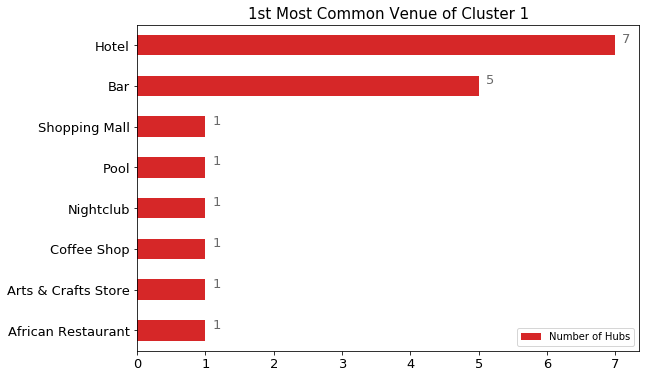

In [34]:
# Group by hub type
df_c1= c1.groupby('1st Most Common Venue').count()
df_c1.reset_index(None, inplace=True)

# Dataframe for plotting the analysis result
column_namesc1 = ['1st Most Common Venue', 'Number of Hubs']
df_pltc1= pd.DataFrame(columns=column_namesc1)
df_pltc1['1st Most Common Venue'] = df_c1['1st Most Common Venue']
df_pltc1['Number of Hubs'] = df_c1['Name']
df_pltc1.sort_values(['Number of Hubs'],inplace=True)
df_pltc1.set_index(['1st Most Common Venue'],inplace=True)

# Bar chart setting
ax = df_pltc1.plot(kind='barh', figsize=(9,6),color="C3", fontsize=13)
ax.set_title('1st Most Common Venue of Cluster 1',fontsize=15)
ax.set_ylabel(None)

# set individual bar lables
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.1, i.get_y()+.31, \
            str(round((i.get_width()), 2)), fontsize=13, color='dimgrey')  

###### <span style="color:black">Cluster 2 </span>

In [35]:
c2=kenya_merge.loc[kenya_merge['Cluster Labels'] == 1, kenya_merge.columns[[1] + list(range(4, kenya_merge.shape[1]))]]
c2

,Name,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Nairobi Industrial Park(JKUAT),-1.093634,37.011659,1,Hostel,Convenience Store,Department Store,Diner,Dumpling Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Fast Food Restaurant,Flower Shop,Food Court


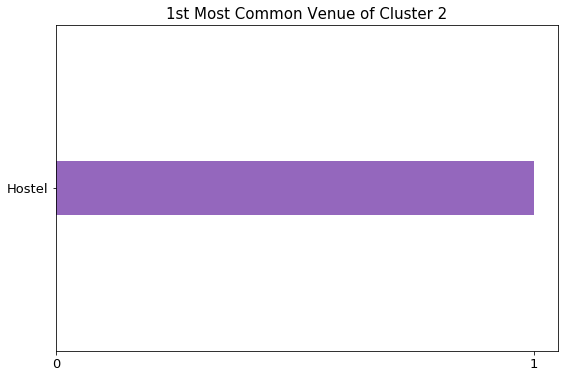

In [36]:
# Group by hub type
df_c2= c2.groupby('1st Most Common Venue').count()
df_c2.reset_index(None, inplace=True)

# Dataframe for plotting the analysis result
column_namesc2 = ['1st Most Common Venue', 'Number of Hubs']
df_pltc2= pd.DataFrame(columns=column_namesc2)
df_pltc2['1st Most Common Venue'] = df_c2['1st Most Common Venue']
df_pltc2['Number of Hubs'] = df_c2['Name']
df_pltc2.sort_values(['Number of Hubs'],inplace=True)
df_pltc2.set_index(['1st Most Common Venue'],inplace=True)

# Bar chart setting
ax = df_pltc2.plot(kind='barh', figsize=(9,6),color="C4", fontsize=13, width=0.1)
ax.set_title('1st Most Common Venue of Cluster 2',fontsize=15)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_ylabel(None)
ax.legend().set_visible(False)

###### <span style="color:black">Cluster 3 </span>

In [37]:
c3=kenya_merge.loc[kenya_merge['Cluster Labels'] == 2, kenya_merge.columns[[1] + list(range(4, kenya_merge.shape[1]))]]
c3

,Name,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Empty Hub,0.566012,34.559121,2,African Restaurant,Nightclub,Department Store,Grocery Store,Hotel Bar,Thai Restaurant,Food Court,Deli / Bodega,Vineyard,Diner
16,Dedan Kimathi University Innovation and Incuba...,-0.397222,36.961085,2,African Restaurant,Convenience Store,Department Store,Diner,Dumpling Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Fast Food Restaurant,Flower Shop,Food Court


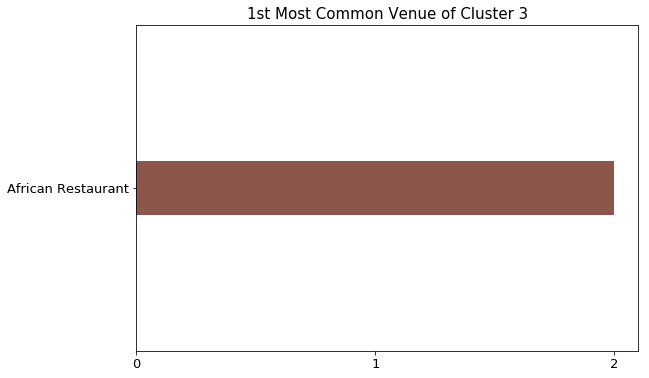

In [38]:
# Group by hub type
df_c3= c3.groupby('1st Most Common Venue').count()
df_c3.reset_index(None, inplace=True)

# Dataframe for plotting the analysis result
column_namesc3 = ['1st Most Common Venue', 'Number of Hubs']
df_pltc3= pd.DataFrame(columns=column_namesc3)
df_pltc3['1st Most Common Venue'] = df_c3['1st Most Common Venue']
df_pltc3['Number of Hubs'] = df_c3['Name']
df_pltc3.sort_values(['Number of Hubs'],inplace=True)
df_pltc3.set_index(['1st Most Common Venue'],inplace=True)

# Bar chart setting
ax = df_pltc3.plot(kind='barh', figsize=(9,6),color="C5", fontsize=13, width=0.1)
ax.set_title('1st Most Common Venue of Cluster 3',fontsize=15)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_ylabel(None)
ax.legend().set_visible(False)

### The Capstone Project ends here, thank you!